In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re, requests
from bs4 import BeautifulSoup
%matplotlib inline

In [2]:
#Importing data to work with
segment_df = pd.read_excel("nvidia_revenue.xlsx",sheet_name="segment")
geo_df = pd.read_excel("nvidia_revenue.xlsx",sheet_name="geographical")
market_df = pd.read_excel("nvidia_revenue.xlsx",sheet_name="markets")

In [3]:
segment_df

,Unnamed: 0,2020,2021,2022
0,Graphics,7639,9834,15868
1,Computing & Networking,3279,6841,11046


In [4]:
segment_df = pd.melt(segment_df, value_vars=[2020, 2021,2022],id_vars=['Unnamed: 0'],value_name="Amount",var_name="Year")

In [5]:
segment_df=segment_df.rename(columns={"Unnamed: 0":"Segments"})
segment_df

,Segments,Year,Amount
0,Graphics,2020,7639
1,Computing & Networking,2020,3279
2,Graphics,2021,9834
3,Computing & Networking,2021,6841
4,Graphics,2022,15868
5,Computing & Networking,2022,11046


In [6]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.0f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.0f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

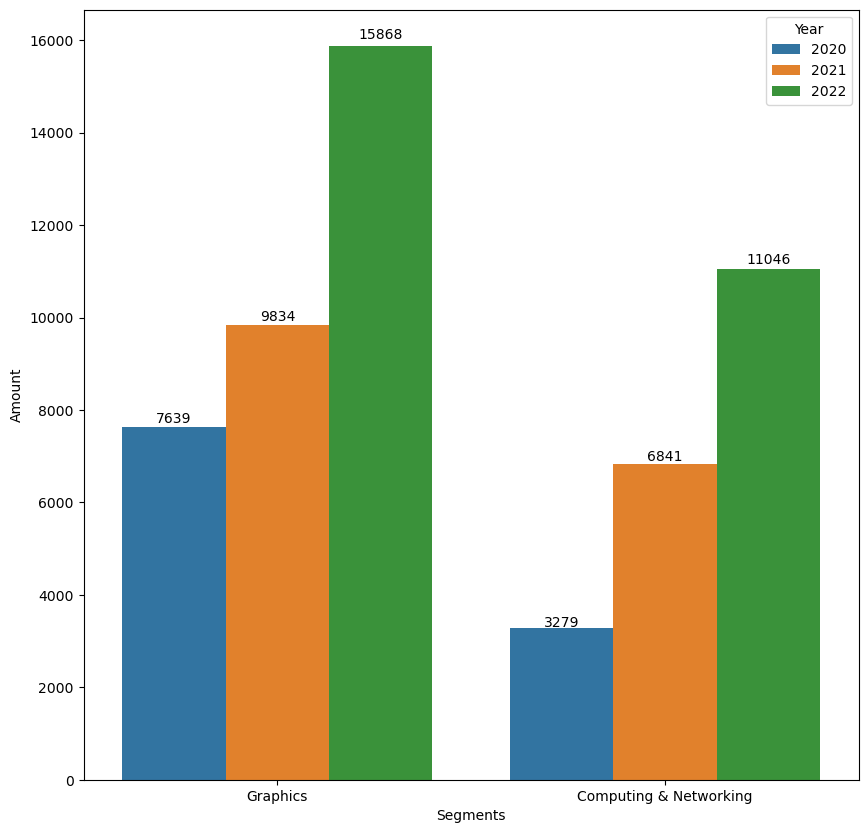

In [7]:
plt.figure(figsize=[10,10])
d = sns.barplot(data=segment_df,x="Segments",y="Amount",hue="Year")
show_values(d)

In [8]:
market_df = pd.melt(market_df, value_vars=[2020, 2021,2022],id_vars=['Unnamed: 0'],value_name="Amount",var_name="Year")
market_df=market_df.rename(columns={"Unnamed: 0":"Markets"})
market_df

,Markets,Year,Amount
0,Gaming,2020,5518
1,Data Center,2020,2983
2,Professional Visualization,2020,1212
3,Automotive,2020,700
4,OEM & Other,2020,505
5,Gaming,2021,7759
6,Data Center,2021,6696
7,Professional Visualization,2021,1053
8,Automotive,2021,536
9,OEM & Other,2021,631


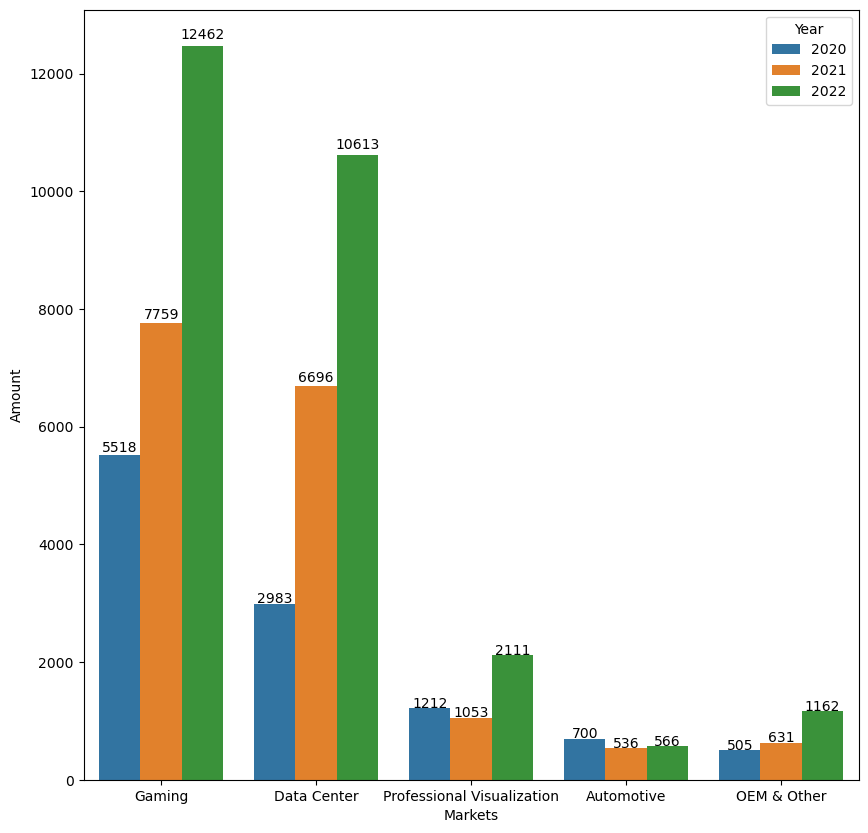

In [9]:
plt.figure(figsize=[10,10])
p = sns.barplot(data=market_df,x="Markets",y="Amount",hue="Year")
show_values(p)

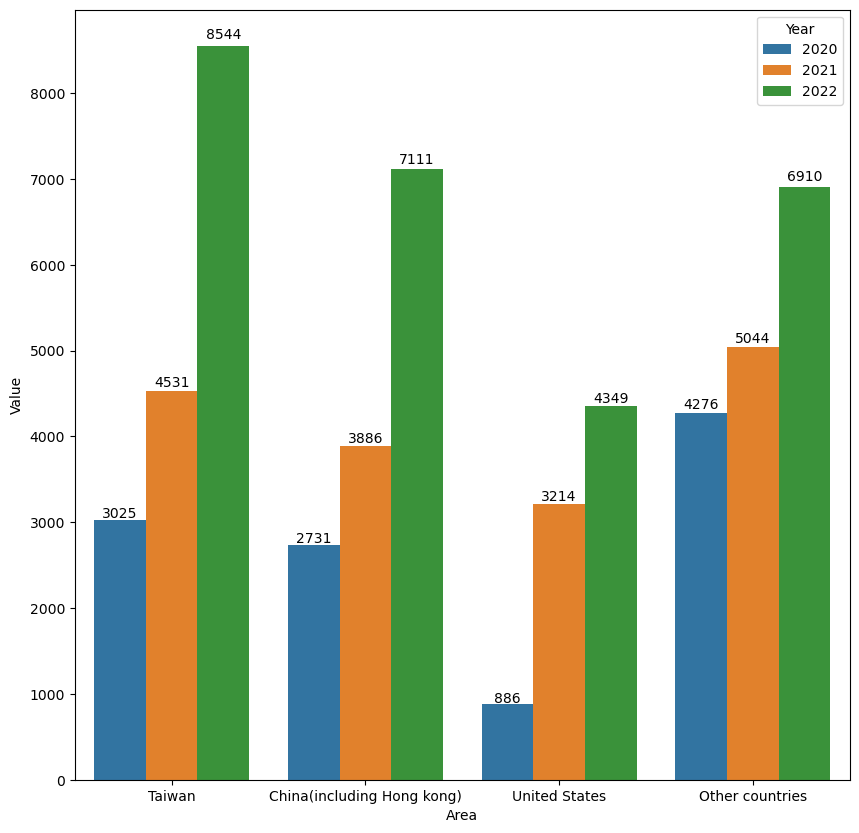

In [10]:
plt.figure(figsize=[10,10])
q = sns.barplot(data=geo_df,x="Area",y="Value",hue="Year")
show_values(q)

In [11]:
historical_df = pd.read_excel("nvidia_revenue.xlsx",sheet_name="historical")
historical_df

,Year,Amount
0,2022,26914
1,2021,16675
2,2020,10918
3,2019,11716
4,2018,9714
5,2017,6910
6,2016,5010
7,2015,4682
8,2014,4130
9,2013,4280


In [12]:
historical_df["Amount"] = historical_df["Amount"]/1000
historical_df

,Year,Amount
0,2022,26.914
1,2021,16.675
2,2020,10.918
3,2019,11.716
4,2018,9.714
5,2017,6.910
6,2016,5.010
7,2015,4.682
8,2014,4.130
9,2013,4.280


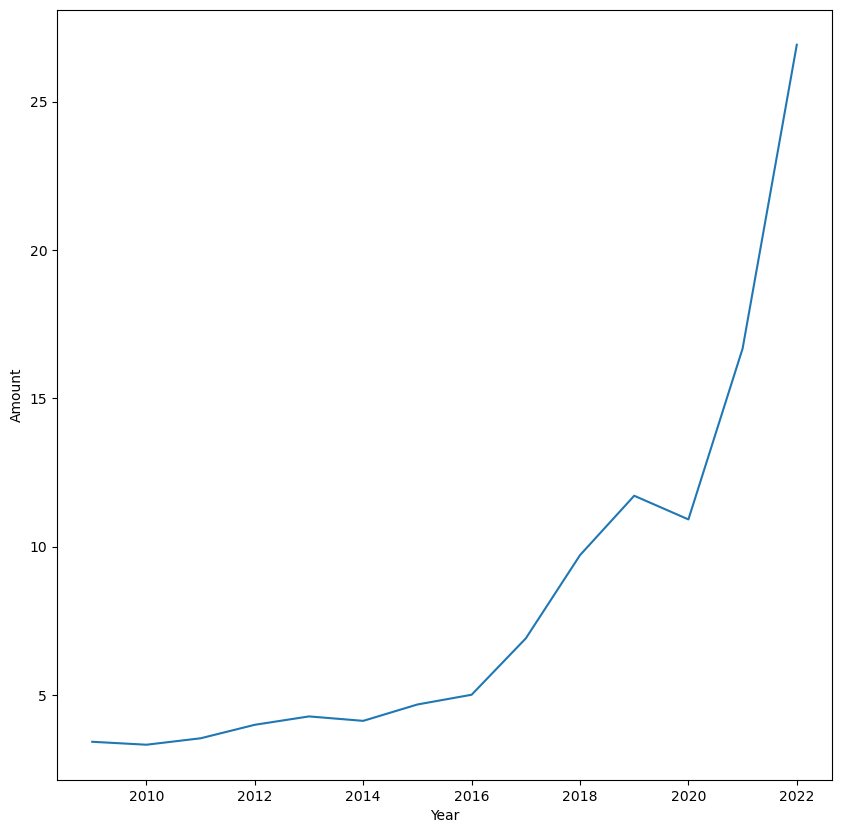

In [13]:
plt.figure(figsize=[10,10])
sns.lineplot(data=historical_df,x="Year",y="Amount")
plt.show()

In [14]:
taiwan_df = pd.read_excel("Taiwan_gdp.xls")
taiwan_df

,"GDP, current prices (Billions of U.S. dollars)",1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Taiwan Province of China,42.285,48.969,49.535,54.148,61.071,63.617,78.195,105.039,126.473,...,609.198,611.396,669.25,774.728,828.659,858.972,901.616,948.513,996.821,1045.227


In [15]:
taiwan_df = taiwan_df.drop(0)

In [16]:
taiwan_df = taiwan_df.T

In [17]:
header = taiwan_df.iloc[0]
taiwan_df = taiwan_df[1:]
taiwan_df.columns = header
taiwan_df

"GDP, current prices (Billions of U.S. dollars)",Taiwan Province of China
1980,42.285
1981,48.969
1982,49.535
1983,54.148
1984,61.071
1985,63.617
1986,78.195
1987,105.039
1988,126.473
1989,152.704


In [18]:
#taiwan_df = taiwan_df.reset_index(names="Year")
taiwan_df.rename(columns={"Taiwan Province of China":"Taiwan GDP"},inplace=True)


In [19]:
taiwan_df.rename_axis("",axis="columns",inplace=True)

In [20]:
taiwan_df

,Taiwan GDP
1980,42.285
1981,48.969
1982,49.535
1983,54.148
1984,61.071
1985,63.617
1986,78.195
1987,105.039
1988,126.473
1989,152.704


In [21]:
taiwan_df["gdp_growth"] = ((taiwan_df["Taiwan GDP"]/taiwan_df["Taiwan GDP"].shift(1))-1)*100
taiwan_df

,Taiwan GDP,gdp_growth
1980,42.285,NaN
1981,48.969,15.807024
1982,49.535,1.155833
1983,54.148,9.312607
1984,61.071,12.785329
1985,63.617,4.168918
1986,78.195,22.915259
1987,105.039,34.329561
1988,126.473,20.405754
1989,152.704,20.740395


In [22]:
historical_df["pct_change"] = ((historical_df["Amount"]/historical_df["Amount"].shift(-1))-1)*100
historical_df

,Year,Amount,pct_change
0,2022,26.914,61.403298
1,2021,16.675,52.729438
2,2020,10.918,-6.811198
3,2019,11.716,20.609430
4,2018,9.714,40.578871
5,2017,6.910,37.924152
6,2016,5.010,7.005553
7,2015,4.682,13.365617
8,2014,4.130,-3.504673
9,2013,4.280,7.053527


In [23]:
taiwan_df.rename_axis("Year",inplace=True)

In [24]:
corr_df = taiwan_df.join(historical_df.set_index("Year"),how="right")

In [25]:
corr_df

,Taiwan GDP,gdp_growth,Amount,pct_change
Year,,,,
2022,828.659,6.961282,26.914,61.403298
2021,774.728,15.760628,16.675,52.729438
2020,669.25,9.462607,10.918,-6.811198
2019,611.396,0.360802,11.716,20.609430
2018,609.198,3.125778,9.714,40.578871
2017,590.733,8.774382,6.910,37.924152
2016,543.081,1.602574,5.010,7.005553
2015,534.515,-0.15187,4.682,13.365617
2014,535.328,4.364033,4.130,-3.504673


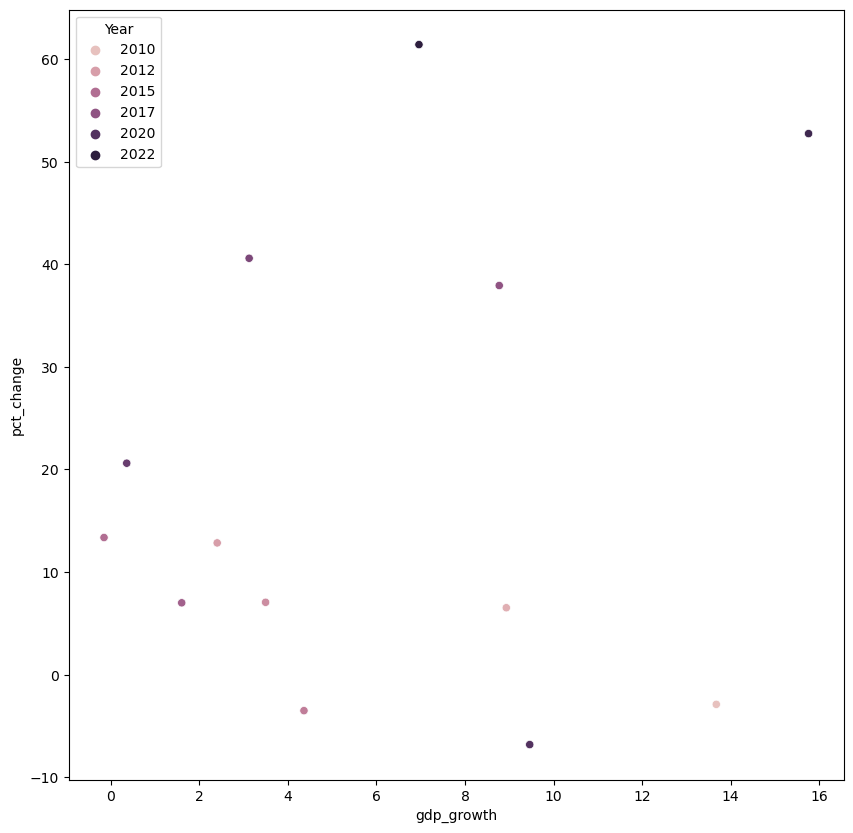

In [26]:
plt.figure(figsize=[10,10])
sns.scatterplot(data=corr_df,y="pct_change",x="gdp_growth",hue="Year")
plt.show()

In [86]:
gdp_df = pd.read_csv("GDP_growth.csv",skip_blank_lines=True,
                     skiprows=4)
gdp_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,6.429817,-0.020479,3.543630,2.116716,5.482371,5.257856,0.635029,-18.589100,17.172509,NaN
1,Africa Eastern and Southern,AFE,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,0.237304,7.984460,5.163873,4.583677,5.328044,...,4.221358,3.990637,2.976421,2.224016,2.546020,2.510797,2.078473,-2.900490,4.293395,NaN
2,Afghanistan,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,5.600745,2.724543,1.451315,2.260314,2.647003,1.189228,3.911603,-2.351101,-20.737146,NaN
3,Africa Western and Central,AFW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,1.835056,3.772898,7.282985,5.392705,4.056588,...,6.108758,5.930450,2.745137,0.113687,2.305623,2.946175,3.190879,-0.900382,3.965399,NaN
4,Angola,AGO,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,4.950000,4.820000,0.940000,-2.580000,-0.150000,-1.316312,-0.700000,-5.600000,1.100000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,5.340908,3.348804,5.916270,5.571757,4.825690,3.406631,4.756831,-5.340275,10.745612,NaN
262,"Yemen, Rep.",YEM,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,4.823519,-0.188690,-27.994546,-9.375124,-5.071796,0.752448,NaN,NaN,NaN,NaN
263,South Africa,ZAF,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,3.844734,6.177931,7.373709,7.939609,6.122798,...,2.485468,1.413826,1.321862,0.664552,1.157947,1.522329,0.303453,-6.342471,4.913097,NaN
264,Zambia,ZMB,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,1.361382,-2.490839,3.272393,12.214048,16.647456,...,5.057232,4.697992,2.920375,3.776679,3.504336,4.034494,1.441306,-2.785055,4.598734,NaN


In [90]:
gdp_df = gdp_df.drop(columns=["Unnamed: 66"]).T.drop(["Indicator Name","Indicator Code"])
header = gdp_df.iloc[0]
gdp_df = gdp_df[1:]
gdp_df.columns = header
gdp_df

Country Name,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
Country Code,ABW,AFE,AFG,AFW,AGO,ALB,AND,ARB,ARE,ARG,...,VIR,VNM,VUT,WLD,WSM,XKX,YEM,ZAF,ZMB,ZWE
1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961,NaN,0.237304,NaN,1.835056,NaN,NaN,NaN,NaN,NaN,5.427843,...,NaN,NaN,NaN,3.789979,NaN,NaN,NaN,3.844734,1.361382,6.316157
1962,NaN,7.98446,NaN,3.772898,NaN,NaN,NaN,NaN,NaN,-0.852022,...,NaN,NaN,NaN,5.316037,NaN,NaN,NaN,6.177931,-2.490839,1.434471
1963,NaN,5.163873,NaN,7.282985,NaN,NaN,NaN,NaN,NaN,-5.308197,...,NaN,NaN,NaN,5.185396,NaN,NaN,NaN,7.373709,3.272393,6.244345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,5.482371,2.54602,2.647003,2.305623,-0.15,3.802227,0.346072,1.056333,0.735069,2.818503,...,-0.735294,6.940188,6.317305,3.384964,1.406282,4.82569,-5.071796,1.157947,3.504336,4.080264
2018,5.257856,2.510797,1.189228,2.946175,-1.316312,4.01936,1.588765,2.383925,1.313914,-2.617396,...,1.904762,7.464991,2.90023,3.285537,-0.609647,3.406631,0.752448,1.522329,4.034494,5.009867
2019,0.635029,2.078473,3.911603,3.190879,-0.7,2.088063,2.015548,1.256279,1.108348,-2.000861,...,2.777778,7.359281,3.241188,2.59129,4.451859,4.756831,NaN,0.303453,1.441306,-6.332446
2020,-18.5891,-2.90049,-2.351101,-0.900382,-5.6,-3.48163,-11.18394,-4.844774,-4.957052,-9.943235,...,-2.147007,2.865412,-5.396254,-3.115404,-3.108444,-5.340275,NaN,-6.342471,-2.785055,-7.816951


In [98]:
gdp_df_clean = gdp_df.rename_axis(" ",axis="columns").drop("Country Code").rename_axis("Year")

In [99]:
gdp_df_clean

,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961,NaN,0.237304,NaN,1.835056,NaN,NaN,NaN,NaN,NaN,5.427843,...,NaN,NaN,NaN,3.789979,NaN,NaN,NaN,3.844734,1.361382,6.316157
1962,NaN,7.98446,NaN,3.772898,NaN,NaN,NaN,NaN,NaN,-0.852022,...,NaN,NaN,NaN,5.316037,NaN,NaN,NaN,6.177931,-2.490839,1.434471
1963,NaN,5.163873,NaN,7.282985,NaN,NaN,NaN,NaN,NaN,-5.308197,...,NaN,NaN,NaN,5.185396,NaN,NaN,NaN,7.373709,3.272393,6.244345
1964,NaN,4.583677,NaN,5.392705,NaN,NaN,NaN,NaN,NaN,10.130298,...,NaN,NaN,NaN,6.558285,NaN,NaN,NaN,7.939609,12.214048,-1.106172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,5.482371,2.54602,2.647003,2.305623,-0.15,3.802227,0.346072,1.056333,0.735069,2.818503,...,-0.735294,6.940188,6.317305,3.384964,1.406282,4.82569,-5.071796,1.157947,3.504336,4.080264
2018,5.257856,2.510797,1.189228,2.946175,-1.316312,4.01936,1.588765,2.383925,1.313914,-2.617396,...,1.904762,7.464991,2.90023,3.285537,-0.609647,3.406631,0.752448,1.522329,4.034494,5.009867
2019,0.635029,2.078473,3.911603,3.190879,-0.7,2.088063,2.015548,1.256279,1.108348,-2.000861,...,2.777778,7.359281,3.241188,2.59129,4.451859,4.756831,NaN,0.303453,1.441306,-6.332446


In [106]:
us_df = gdp_df_clean.loc[:,"United States"].to_frame()

In [112]:
us_dd = us_df.reset_index()

In [117]:
us_dd["Year"] = pd.to_numeric(us_dd["Year"])

In [128]:
corr1_df = us_dd.set_index("Year").join(historical_df.set_index("Year"),how="inner")
corr1_df

,United States,Amount,pct_change
Year,,,
2009,-2.599888,3.425,NaN
2010,2.708857,3.326,-2.890511
2011,1.549895,3.543,6.524354
2012,2.280688,3.998,12.842224
2013,1.841875,4.280,7.053527
2014,2.287776,4.130,-3.504673
2015,2.70637,4.682,13.365617
2016,1.667472,5.010,7.005553
2017,2.241921,6.910,37.924152


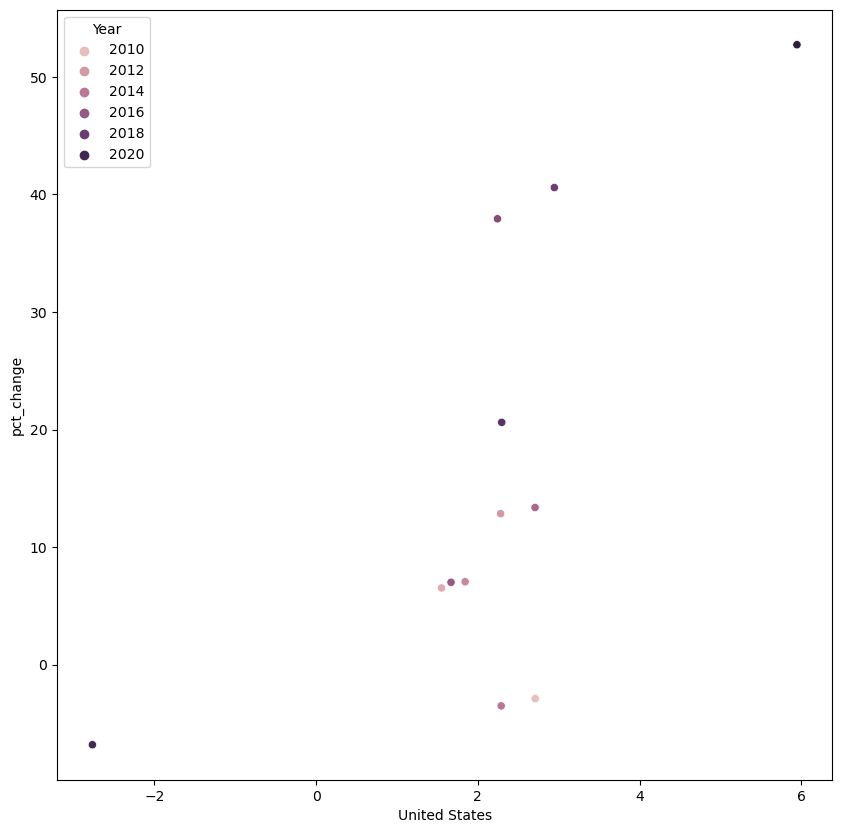

In [129]:
plt.figure(figsize=[10,10])
sns.scatterplot(data=corr1_df,y="pct_change",x="United States",hue="Year")
plt.show()

In [ ]:
gdp_df_clean["China"]

In [131]:
china_df = gdp_df_clean.loc[:,"China"].to_frame()
china_dd = china_df.reset_index()
china_dd["Year"] = pd.to_numeric(china_dd["Year"])
china_dd

,Year,China
0,1960,NaN
1,1961,-27.27
2,1962,-5.58
3,1963,10.3
4,1964,18.18
...,...,...
57,2017,6.947201
58,2018,6.749774
59,2019,5.950501
60,2020,2.239702


In [132]:
corr2_df = china_dd.set_index("Year").join(historical_df.set_index("Year"),how="inner")
corr2_df

,China,Amount,pct_change
Year,,,
2009,9.398726,3.425,NaN
2010,10.635871,3.326,-2.890511
2011,9.550832,3.543,6.524354
2012,7.863736,3.998,12.842224
2013,7.76615,4.280,7.053527
2014,7.425764,4.130,-3.504673
2015,7.041329,4.682,13.365617
2016,6.848762,5.010,7.005553
2017,6.947201,6.910,37.924152


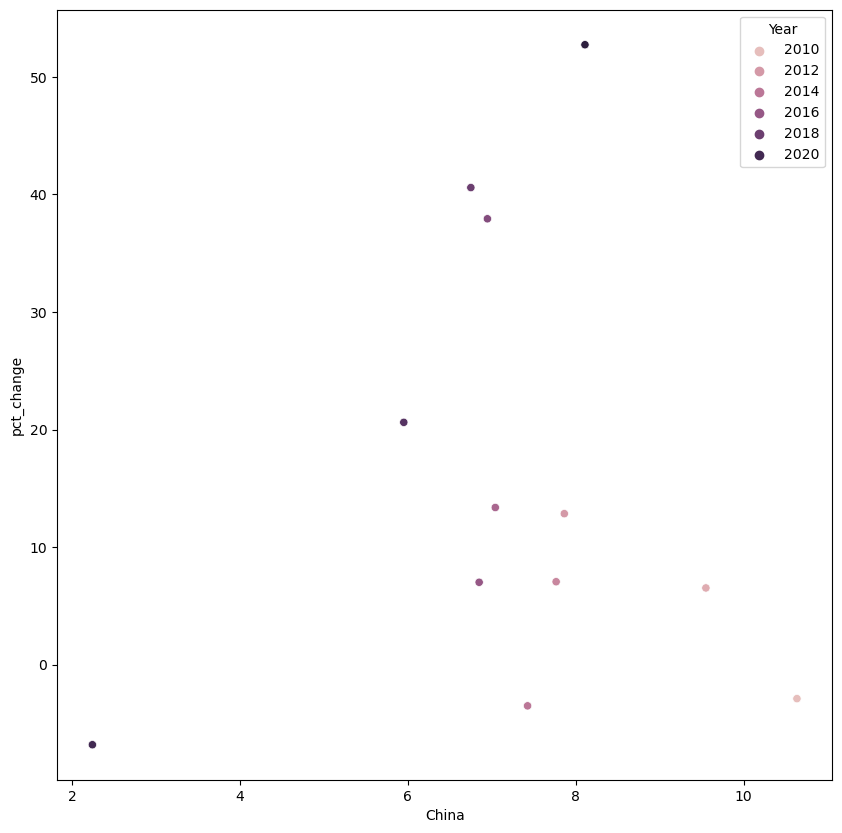

In [134]:
plt.figure(figsize=[10,10])
sns.scatterplot(data=corr2_df,y="pct_change",x="China",hue="Year")
plt.show()

In [135]:
from sklearn.svm import SVR


In [136]:
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel="linear", C=100, gamma="auto")
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)

In [141]:
X = np.array(corr_df["Taiwan GDP"]).reshape(-1, 1)
y = np.array(corr_df["Amount"])

In [ ]:
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ["RBF", "Linear", "Polynomial"]
model_color = ["m", "c", "g"]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(
        X,
        svr.fit(X, y).predict(X),
        color=model_color[ix],
        lw=lw,
        label="{} model".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[svr.support_],
        y[svr.support_],
        facecolor="none",
        edgecolor=model_color[ix],
        s=50,
        label="{} support vectors".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[np.setdiff1d(np.arange(len(X)), svr.support_)],
        y[np.setdiff1d(np.arange(len(X)), svr.support_)],
        facecolor="none",
        edgecolor="k",
        s=50,
        label="other training data",
    )
    axes[ix].legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1.1),
        ncol=1,
        fancybox=True,
        shadow=True,
    )

fig.text(0.5, 0.04, "data", ha="center", va="center")
fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

## Web scrapping

In [ ]:
url = 'https://www.sec.gov/Archives/edgar/data/1045810/000101287002002262/d10k.htm#TX270_6'
r = requests.get(url)
soup = BeautifulSoup(r.text, 'html.parser')

title = soup.find('div', string=re.compile('Balance Sheet'))
row = title.parent.parent 
values = [i.text for i in row]
print(values[1:])

In [ ]:
features = soup.find('div',attrs={'class':"M(0) Whs(n) BdEnd Bdc($seperatorColor) D(itb)"})

In [ ]:
 headers = []
temp_list = []
label_list = []
final = []
index = 0
#create headers
for item in features.find_all('div', class_='D(ib)'):
    headers.append(item.text)
    #statement contents
temp = features.find_all('div', class_='D(tbc)')
for line in temp:
    #each item adding to a temporary list
    temp_list.append(line.text)
#temp_list added to final list
final.append(temp_list)

In [4]:
url = 'https://www.sec.gov/Archives/edgar/data/1045810/000101287002002262/d10k.htm#TX270_6'
r = requests.get(url)

In [5]:
soup = BeautifulSoup(r.text, 'html.parser')

In [ ]:
att = {0: cellspacing, 1: cellpadding, 2: width, 3: border, 4: style, cellspacing: cellspacing,style:style,length:5,width:width}

In [10]:
soup

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">

<html xmlns="http://www.w3.org/1999/xhtml">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<title>SEC.gov | Request Rate Threshold Exceeded</title>
<style>
html {height: 100%}
body {height: 100%; margin:0; padding:0;}
#header {background-color:#003968; color:#fff; padding:15px 20px 10px 20px;font-family:Arial, Helvetica, sans-serif; font-size:20px; border-bottom:solid 5px #000;}
#footer {background-color:#003968; color:#fff; padding:15px 20px;font-family:Arial, Helvetica, sans-serif; font-size:20px;}
#content {max-width:650px;margin:60px auto; padding:0 20px 100px 20px; background-image:url(seal_bw.png);background-repeat:no-repeat;background-position:50% 100%;}
h1 {font-family:Georgia, Times, serif; font-size:20px;}
h2 {text-align:center; font-family:Georgia, Times, serif; font-size:20px; width:100%; border-bottom:solid #999 1px;padding

In [154]:
from bs4 import BeautifulSoup
import requests
import sys
from fake_useragent import UserAgent

ua = UserAgent()
headers = ua.random

# Access page
cik = '0001045810'
type1 = '10-K'
dateb = '20020127'

# Obtain HTML for search page
base_url = f"https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK={cik}&type={type}&dateb={dateb}"
edgar_resp = requests.get(base_url,headers={'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.5359.125 Safari/537.36'})

print (edgar_resp)
edgar_str = edgar_resp.text

# Find the document link
doc_link = ''
soup = BeautifulSoup(edgar_str, 'html.parser')
# now you can use BeautifulSoup to find you data 
print(soup)

<Response [200]>
<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">

<html lang="ENG">
<head>
<title>EDGAR Search Results</title>
<link href="/include/interactive.css" rel="stylesheet" type="text/css"/>
<link href="/edgar/search/css/smartSearchCompanyLanding.css" rel="stylesheet" type="text/css"/>
<script language="JavaScript" src="/edgar/search/js/smartSearchCompanyLanding.js" type="text/javascript"></script>
<link href="/cgi-bin/browse-edgar?action=getcompany&amp;CIK=0001045810&amp;type=%3Cclass%20%27type%27%3E%25&amp;dateb=20020127&amp;owner=include&amp;count=40&amp;output=atom" rel="alternate" title="ATOM" type="application/atom+xml"/>
<script>bazadebezolkohpepadr="1626618257"</script><script defer="" src="https://www.sec.gov/akam/13/60f438c8" type="text/javascript"></script></head>
<body style="margin: 0">
<!-- SEC Web Analytics - For information please visit: https://www.sec.gov/privacy.htm#collectedinfo -->
<noscript><iframe he

In [172]:
from bs4 import BeautifulSoup
import requests
import sys
# Access page
cik = '0001045810'
type1 = '10-K'
dateb = '20020127'
base_url = "https://www.sec.gov/Archives/edgar/data/1045810/000101287002002262/d10k.htm#TX270_6"
edgar_resp = requests.get(base_url.format(cik, type, dateb),headers={'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.5359.125 Safari/537.36'})
edgar_str = edgar_resp.text

In [173]:
soup = BeautifulSoup(edgar_str, 'html.parser')

In [178]:
t = soup.findAll('table',attrs={"style":"BORDER-COLLAPSE:COLLAPSE"})
print(t)
trs = t[34].findAll('tr')
for tr in trs:
    if tr.text:
        print(list(tr.stripped_strings))

[<table border="0" cellpadding="0" cellspacing="0" style="BORDER-COLLAPSE:COLLAPSE" width="100%">
<tr>
<td valign="bottom" width="54%"> <div><font face="Times New Roman" size="1"><b><i>Model</i></b></font></div> <hr align="left" color="#000000" noshade="" size="2" width="41"/></td>
<td valign="bottom" width="3%"><font face="Times New Roman" size="1">  </font></td>
<td align="center" valign="bottom"> <div align="center"><font face="Times New Roman" size="1"><b><i>Target Market</i></b></font></div> <hr color="#000000" noshade="" size="2"/></td>
<td valign="bottom" width="3%"><font face="Times New Roman" size="1">  </font></td>
<td align="center" valign="bottom"> <div align="center"><font face="Times New Roman" size="1"><b><i>Transistors</i></b></font></div> <hr color="#000000" noshade="" size="2"/></td>
<td valign="bottom" width="3%"><font face="Times New Roman" size="1">    </font></td>
<td align="center" valign="bottom"> <div align="center"><font face="Times New Roman" size="1"><b><i>P

In [113]:
table_text = unicodedata.normalize('NFKD', tables[34].text).encode('ascii','ignore')

In [114]:
with open("my_file.txt", "wb") as binary_file:
   
    # Write bytes to file
    binary_file.write(table_text)

In [115]:
with open("my_file.txt", "rb") as f:
    while (byte := f.read()):
        print(byte)

b'\n\n  \n  \n Year Ended January 27, 2002 \n  \n Year Ended January 28, 2001  \n  \n Year Ended January 30, 2000  \n\n  \n  \n   \n\n  \n  \n (in thousands)  \n\n Revenue: \n  \n   \n\n U.S. and North America \n  \n $ \n 243,697 \n  \n $ \n 77,809 \n  \n $ \n 103,609  \n\n Asia Pacific \n  \n   \n 1,071,726 \n  \n   \n 556,088 \n  \n   \n 208,832  \n\n Europe \n  \n   \n 54,048 \n  \n   \n 101,367 \n  \n   \n 62,064  \n\n  \n  \n \n \n  \n \n \n  \n \n  \n\n Total revenue \n  \n $ \n 1,369,471 \n  \n $ \n 735,264 \n  \n $ \n 374,505  \n\n  \n  \n \n \n  \n \n \n  \n \n  \n'


In [75]:
revenues_region = [k for k in tables_text if "Europe" and "Asia" in k]

In [95]:
dadu=unicodedata.normalize('NFKD', revenues_region[0]).encode('ascii','ignore')

In [152]:
pd.read_csv("nvidia_rev.csv", sep="/",on_bad_lines='skip')

,"Year Ended January 27, 2002","Year Ended January 28, 2001","Year Ended January 30, 2000 (in thousands)"
Revenue:,,,
U.S. and North America,"$ 243,697","$ 77,809","$ 103,609"
Asia Pacific,"1,071,726","556,088","208,832"
Europe,"54,048","101,367","62,064"
Total revenue,"$ 1,369,471","$ 735,264","$ 374,505"


In [156]:
re.compile(r'Total.*Number.*of.*Shares.*\w*Purchased.*', re.UNICODE|re.IGNORECASE|re.DOTALL)

re.compile(r'Total.*Number.*of.*Shares.*\w*Purchased.*',
           re.IGNORECASE|re.DOTALL|re.UNICODE)

In [160]:
tables

[<table border="0" cellpadding="0" cellspacing="0" style="BORDER-COLLAPSE:COLLAPSE" width="100%">
 <tr>
 <td valign="bottom" width="54%"> <div><font face="Times New Roman" size="1"><b><i>Model</i></b></font></div> <hr align="left" color="#000000" noshade="" size="2" width="41"/></td>
 <td valign="bottom" width="3%"><font face="Times New Roman" size="1">  </font></td>
 <td align="center" valign="bottom"> <div align="center"><font face="Times New Roman" size="1"><b><i>Target Market</i></b></font></div> <hr color="#000000" noshade="" size="2"/></td>
 <td valign="bottom" width="3%"><font face="Times New Roman" size="1">  </font></td>
 <td align="center" valign="bottom"> <div align="center"><font face="Times New Roman" size="1"><b><i>Transistors</i></b></font></div> <hr color="#000000" noshade="" size="2"/></td>
 <td valign="bottom" width="3%"><font face="Times New Roman" size="1">    </font></td>
 <td align="center" valign="bottom"> <div align="center"><font face="Times New Roman" size="1"